Successfully Imported Data!
(1143, 13)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


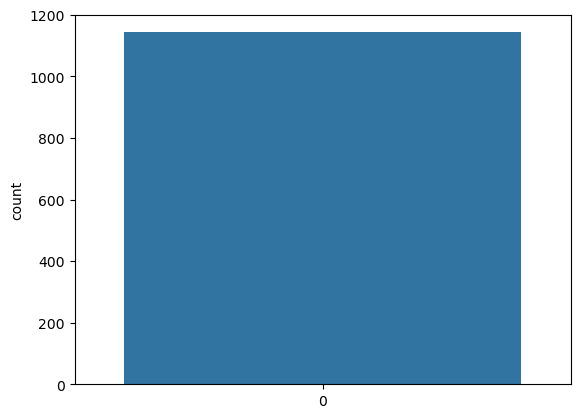

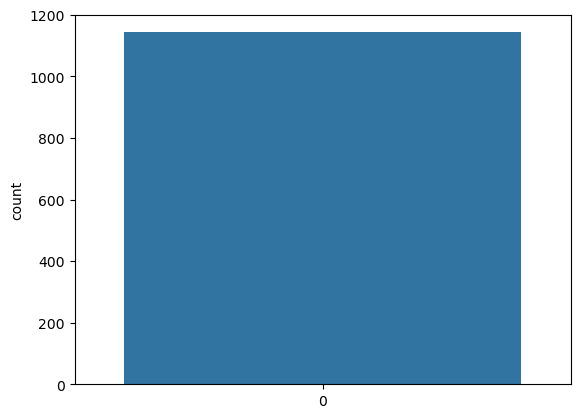

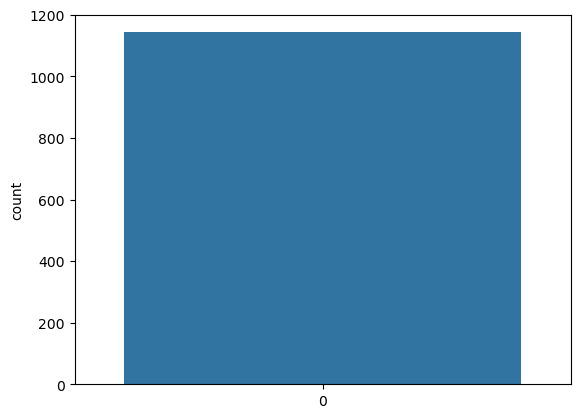

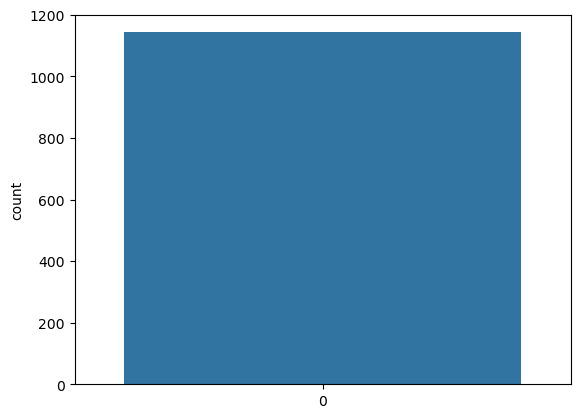

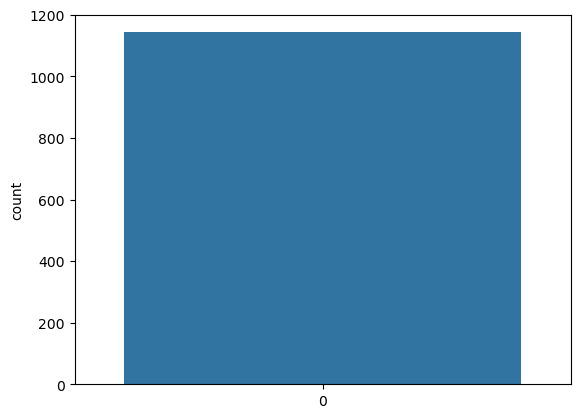

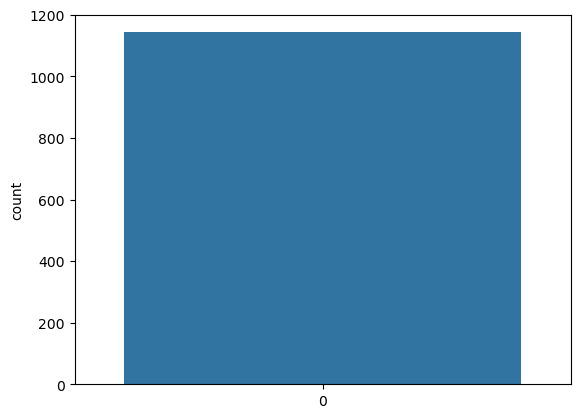

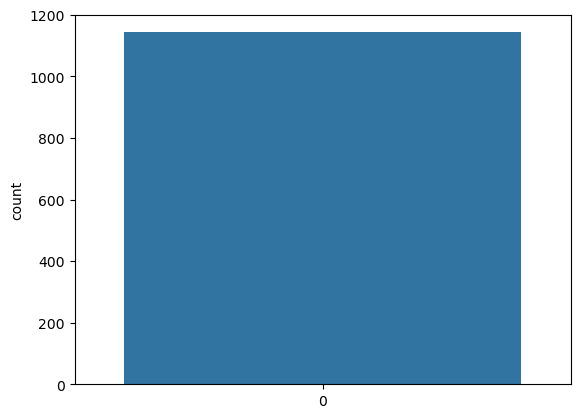

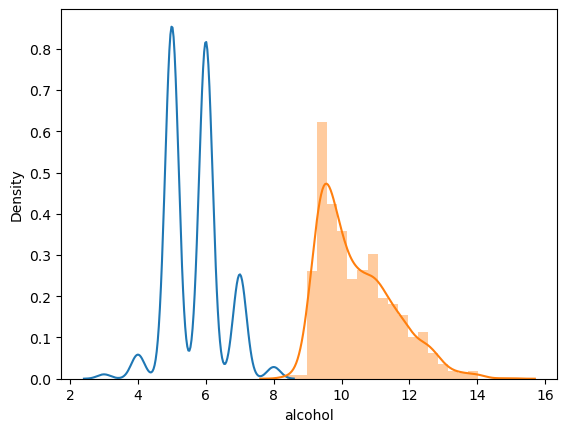

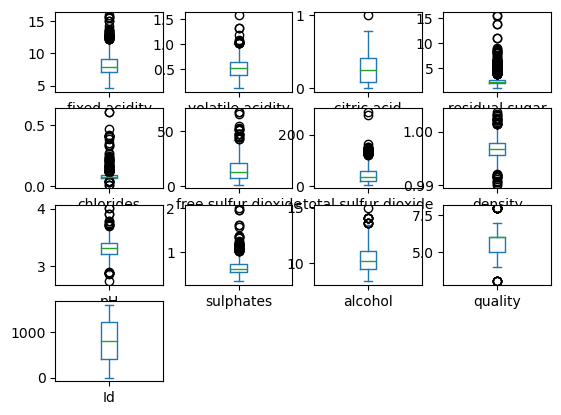

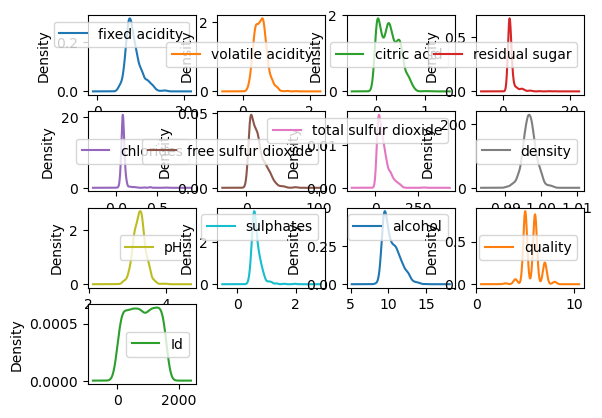

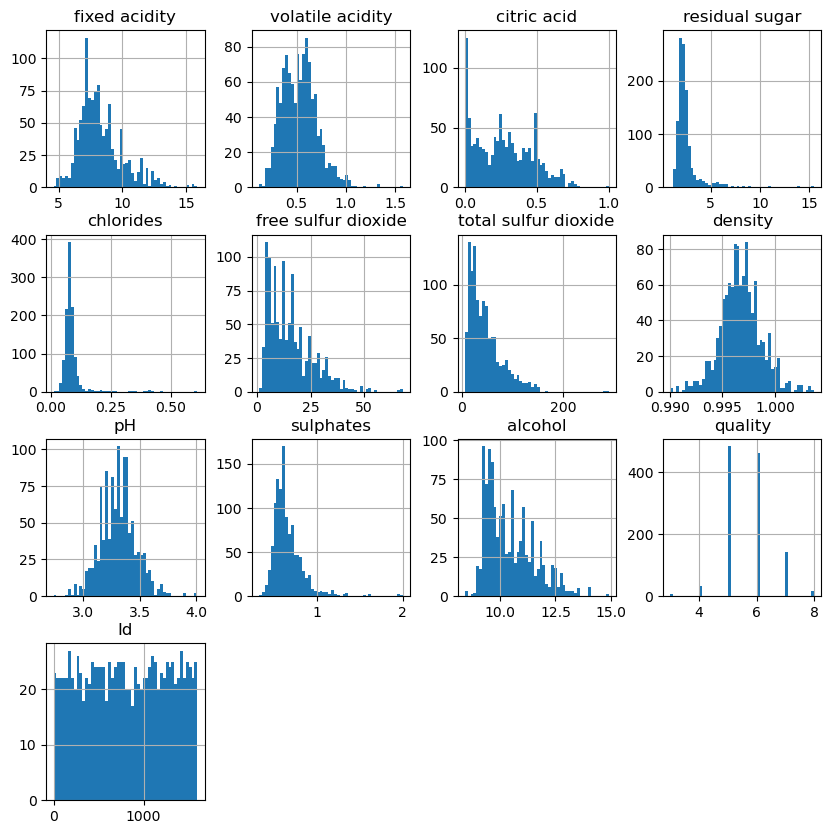

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: goodquality, Length: 1143, dtype: int64
[0.06438859 0.0987568  0.1020009  0.06788226 0.06027722 0.06031632
 0.07571171 0.08224123 0.06347954 0.09977678 0.15533424 0.06983441]
Accuracy Score: 0.8862973760932945
[[289   9]
 [ 30  15]]
Accuracy Score: 0.8017492711370262
Accuracy Score: 0.8688046647230321
Accuracy Score: 0.880466472303207
Accuracy Score: 0.8483965014577259
Accuracy Score: 0.8950437317784257


ModuleNotFoundError: No module named 'xgboost'

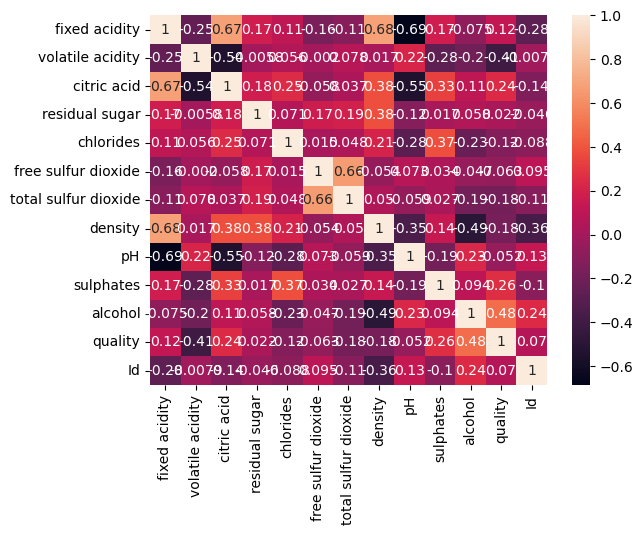

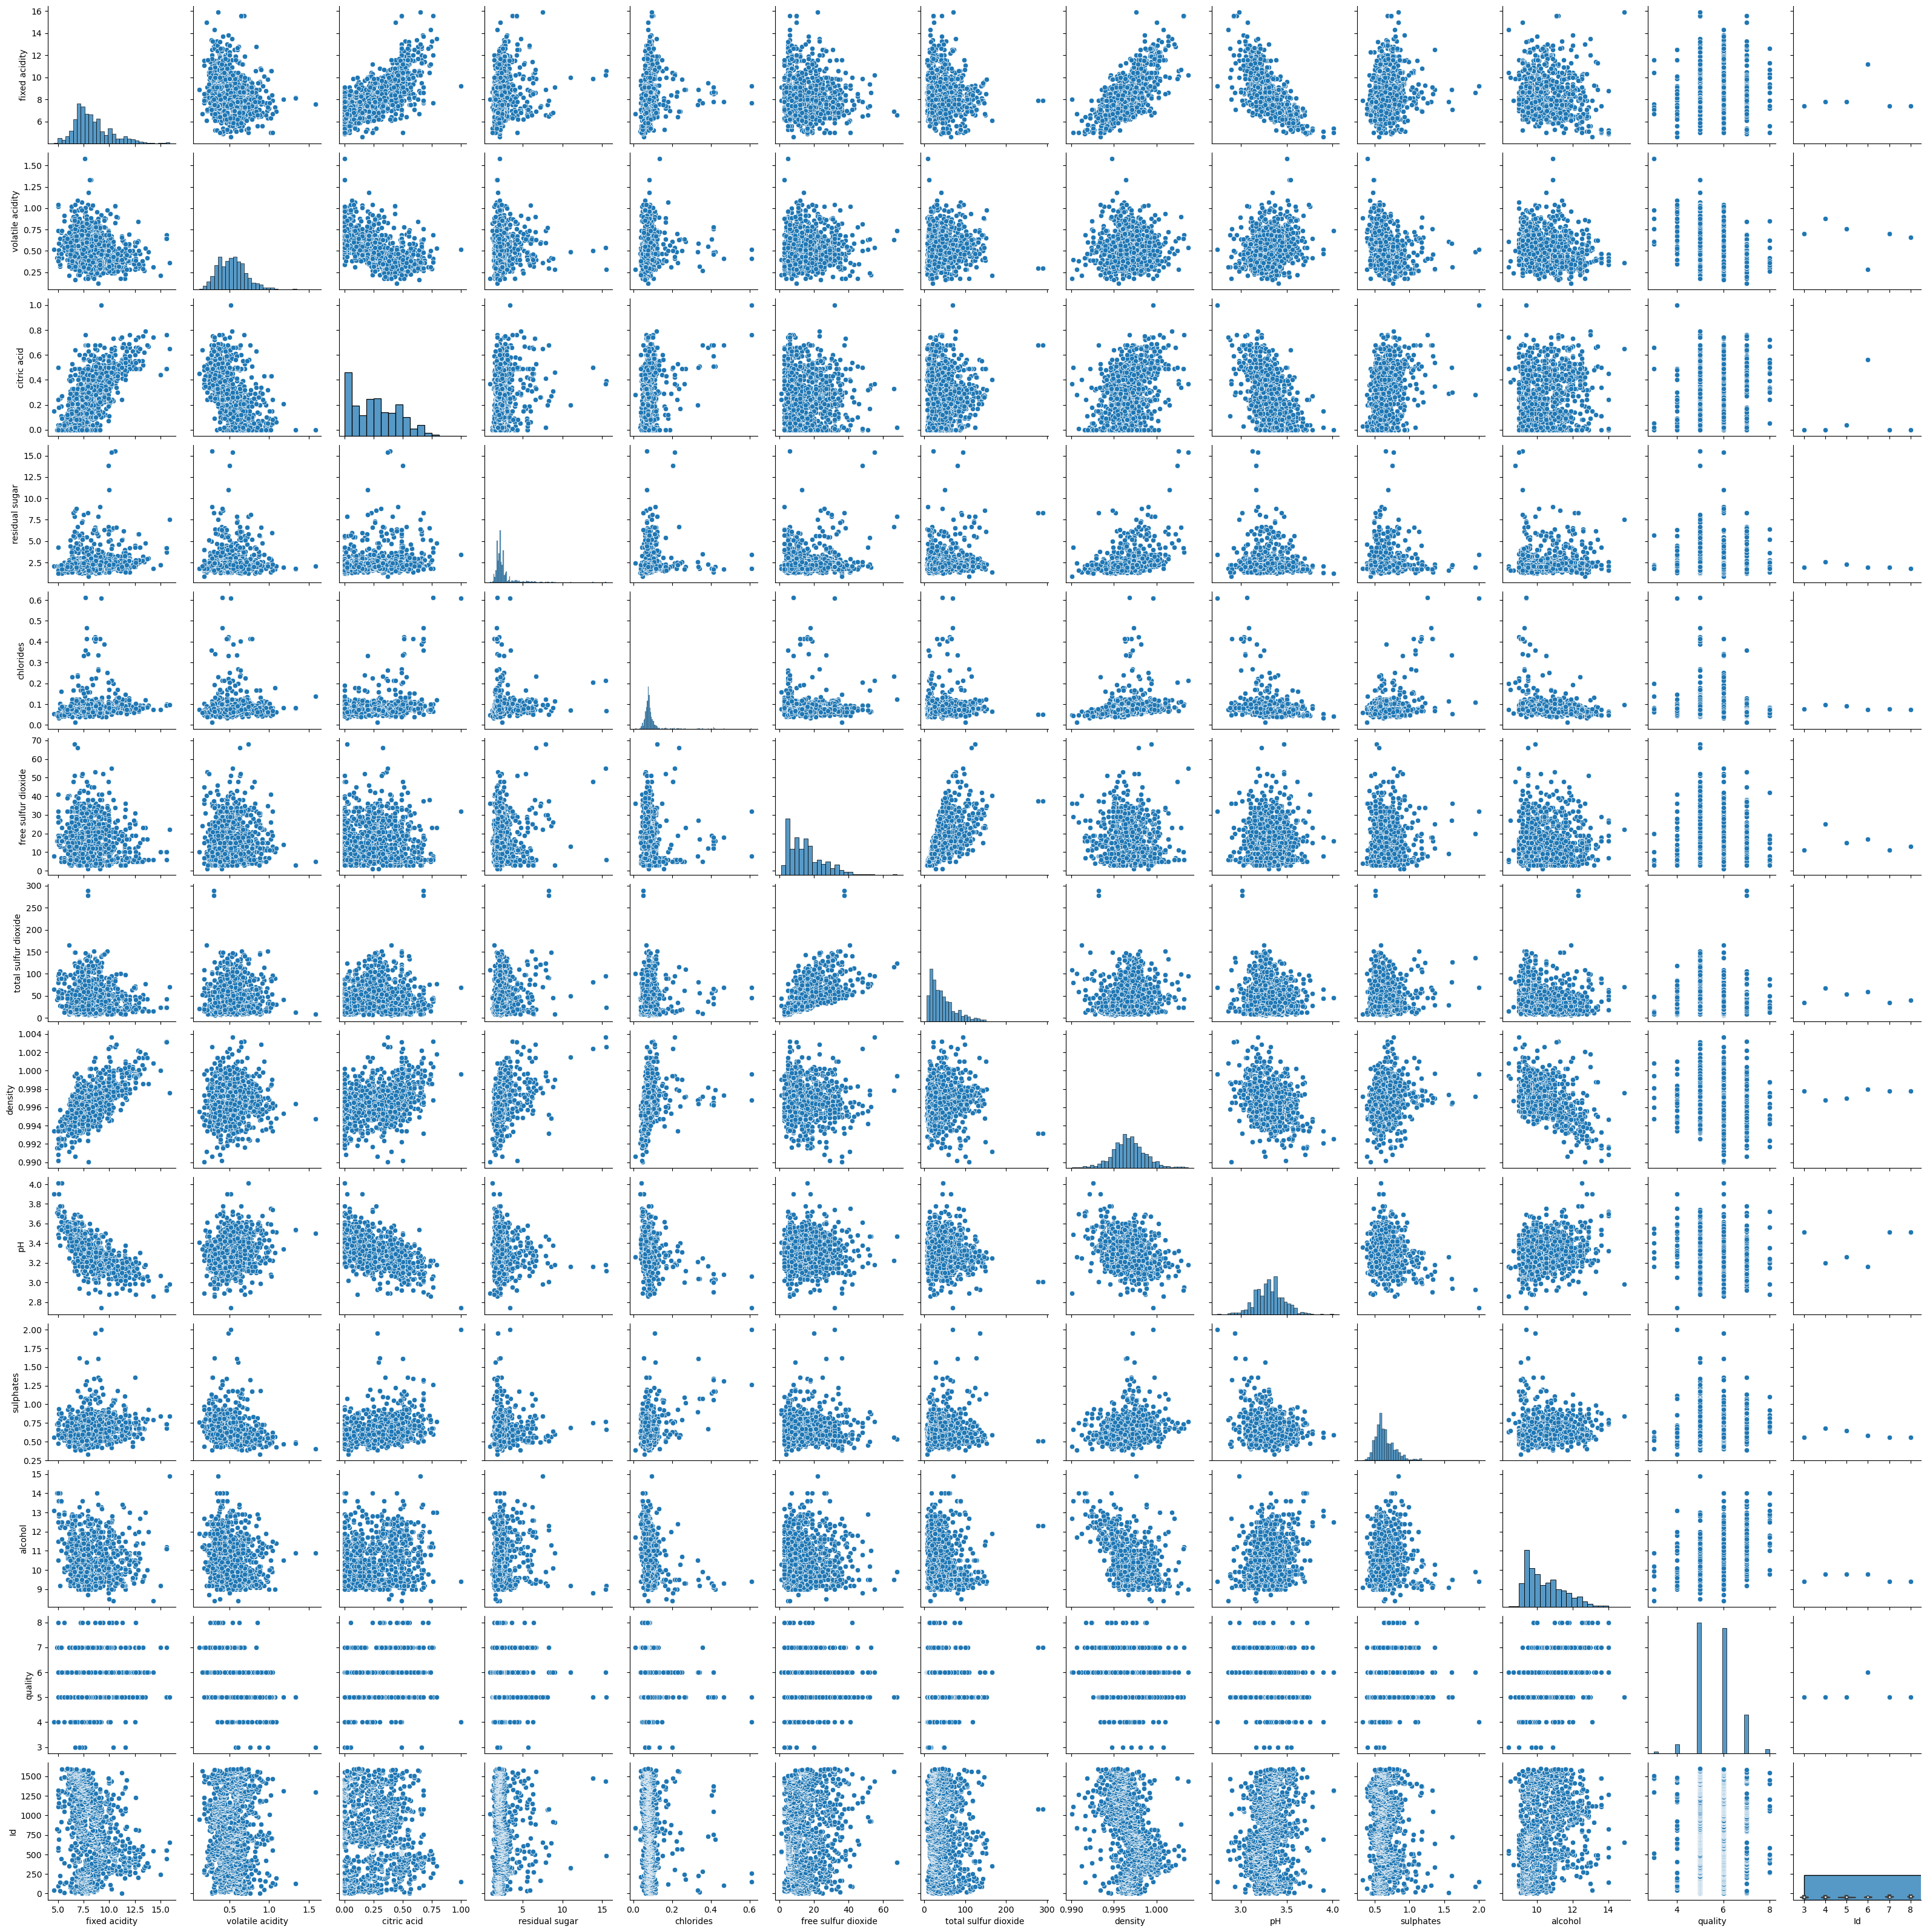

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
import joblib 
filterwarnings(action='ignore')
wine = pd.read_csv("WineQT.csv")
print("Successfully Imported Data!")
wine.head()
print(wine.shape)
wine.describe(include='all')
print(wine.isna().sum())
wine.corr()
wine.groupby('quality').mean()
sns.countplot(wine['quality'])
plt.show()
sns.countplot(wine['pH'])
plt.show()
sns.countplot(wine['alcohol'])
plt.show()
sns.countplot(wine['fixed acidity'])
plt.show()
sns.countplot(wine['volatile acidity'])
plt.show()
sns.countplot(wine['citric acid'])
plt.show()
sns.countplot(wine['density'])
plt.show()
sns.kdeplot(wine.query('quality > 2').quality)
sns.distplot(wine['alcohol'])
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)
wine.hist(figsize=(10,10),bins=50)
plt.show()
corr = wine.corr()
sns.heatmap(corr,annot=True)
sns.pairplot(wine)
sns.violinplot(x='quality', y='alcohol', data=wine)
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']
# See proportion of good vs bad wines
wine['goodquality'].value_counts()
X
print(Y)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)


# Save the trained model using joblib
joblib.dump(model, 'wine_quality_model.joblib')

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.870,0.872,0.868,0.864,0.833,0.893,0.879]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df




In [ ]:
import pickle

In [ ]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, Y_train)

# Save the trained model using pickle
with open('wine_quality_model.pkl', 'wb') as file:
    pickle.dump(model, file)